# Homework 3
## IRIS data
We want to investigate:
- Is there is a relationship between sepal dimensions and petal dimensions?
  - What can you say about the relationship given the figure?
- How are the sepal and petal dimensions distributed?
  - What can you conclude from this figure?   
- The so called pairs-plot is a very simple way of quickly analysing realtionships between data. Generate the following figure
  - Briefly, mention how the different variables are related to each other.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df1 = pd.read_csv("IRIS.csv")

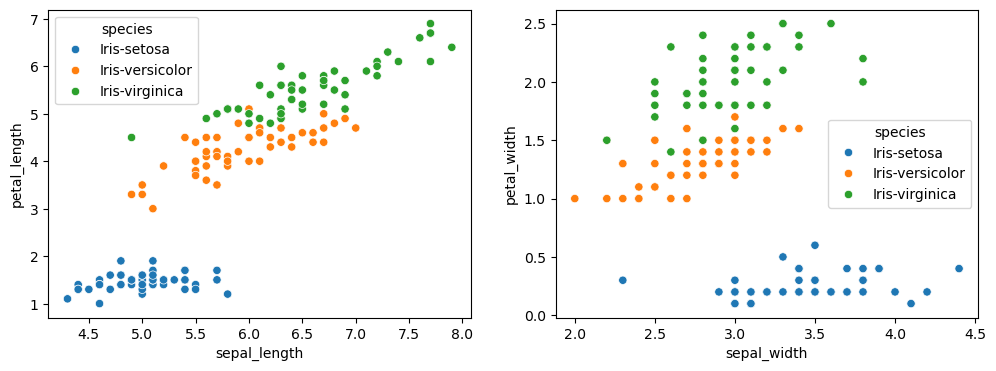

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # one row, two columns

# First scatter plot
sns.scatterplot(
    data = df1,
    x ="sepal_length",
    y ="petal_length",
    hue = "species",
    ax = axes[0] # put at position 1, here that is index 0 since python indexing
)

# Second scatter plot
sns.scatterplot(
    data = df1,
    x = "sepal_width",
    y = "petal_width",
    hue = "species",
    ax = axes[1] # put at position 2, here that is index 0 since python indexing
)

plt.show()

What we can tell from this figure is that the species iris-versicolor and iris-virginicia have a much wider petal length and width compared to iris-setosa with iris-virginica having the largest petals. 

As for the sepal length we can see that it is not as straightforward since we see iris setosa has biggest sepal width on average while iris versicolor and iris virginica having much longer sepals with virginica being on top. 

A possible hypothesis we could draw from this is that iris virginica and veriscolor are more closely related compared to iris setosa. We can also say there might be a sligt relationship between sepal dimensions and petal dimensions. 

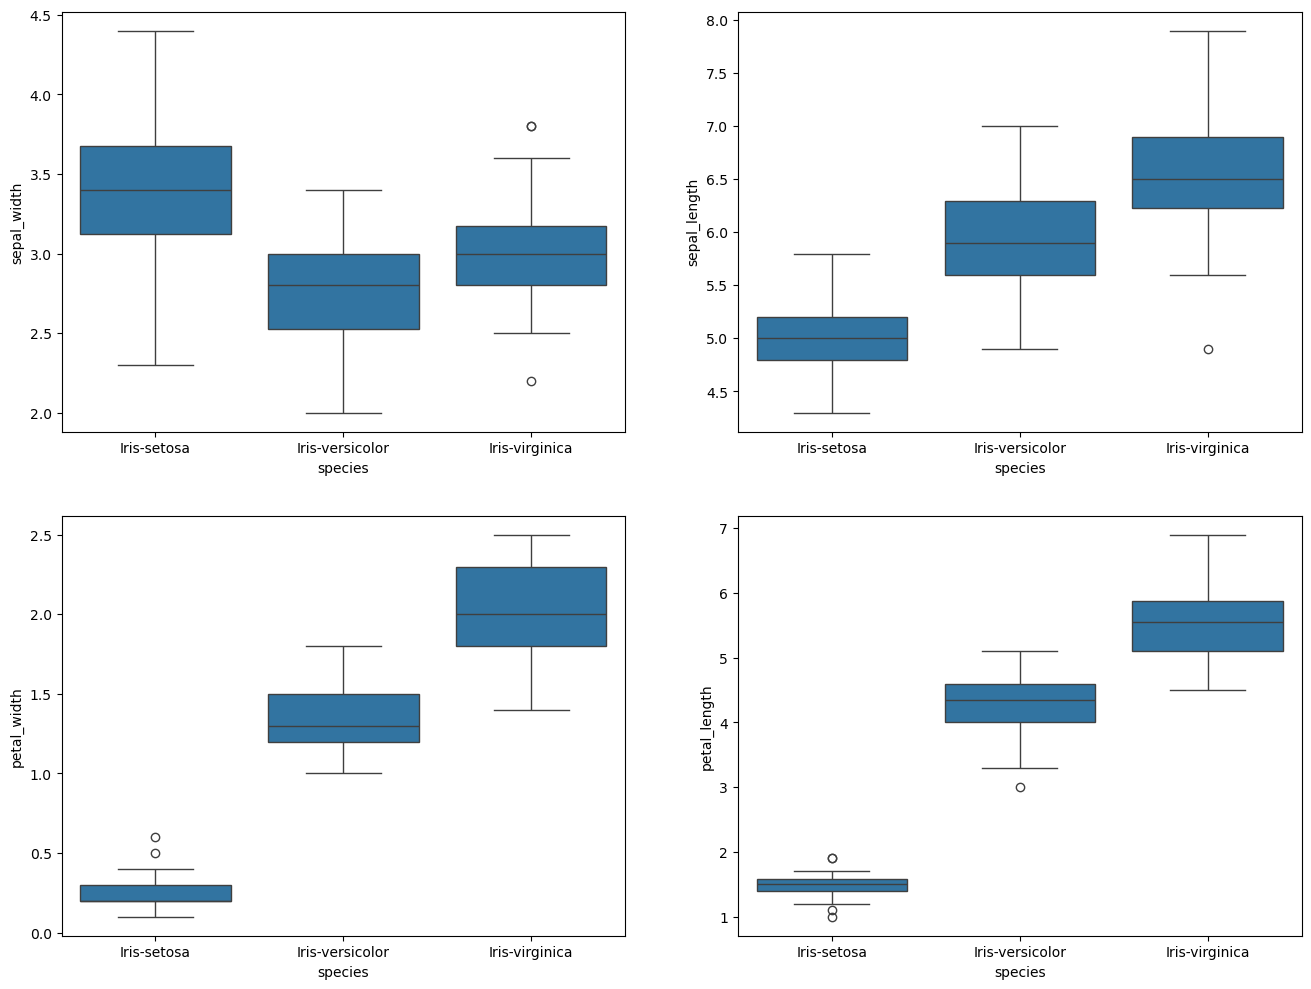

In [22]:
# Create a custom grid of subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Example scatterplots on specific axes
sns.boxplot(
    data=df1,
    x="species",
    y="sepal_width", 
    ax=axes[0, 0]
)
sns.boxplot(
    data=df1, 
    x="species", 
    y="sepal_length", 
    ax=axes[0, 1]
)


sns.boxplot(
    data=df1, 
    x="species", 
    y="petal_width", 
    ax=axes[1, 0]
)
sns.boxplot(
    data=df1, 
    x="species", 
    y="petal_length", 
    ax=axes[1, 1]
)

plt.show()

To answer how the sepal and petal dimensions are distributed we can see that the median is roughly the expected value (middle of each respective boxplot) indicating a normal distribution among all the species which is a reasonable conclusion seeing how growth of many things in nature follows a normal distribution. 

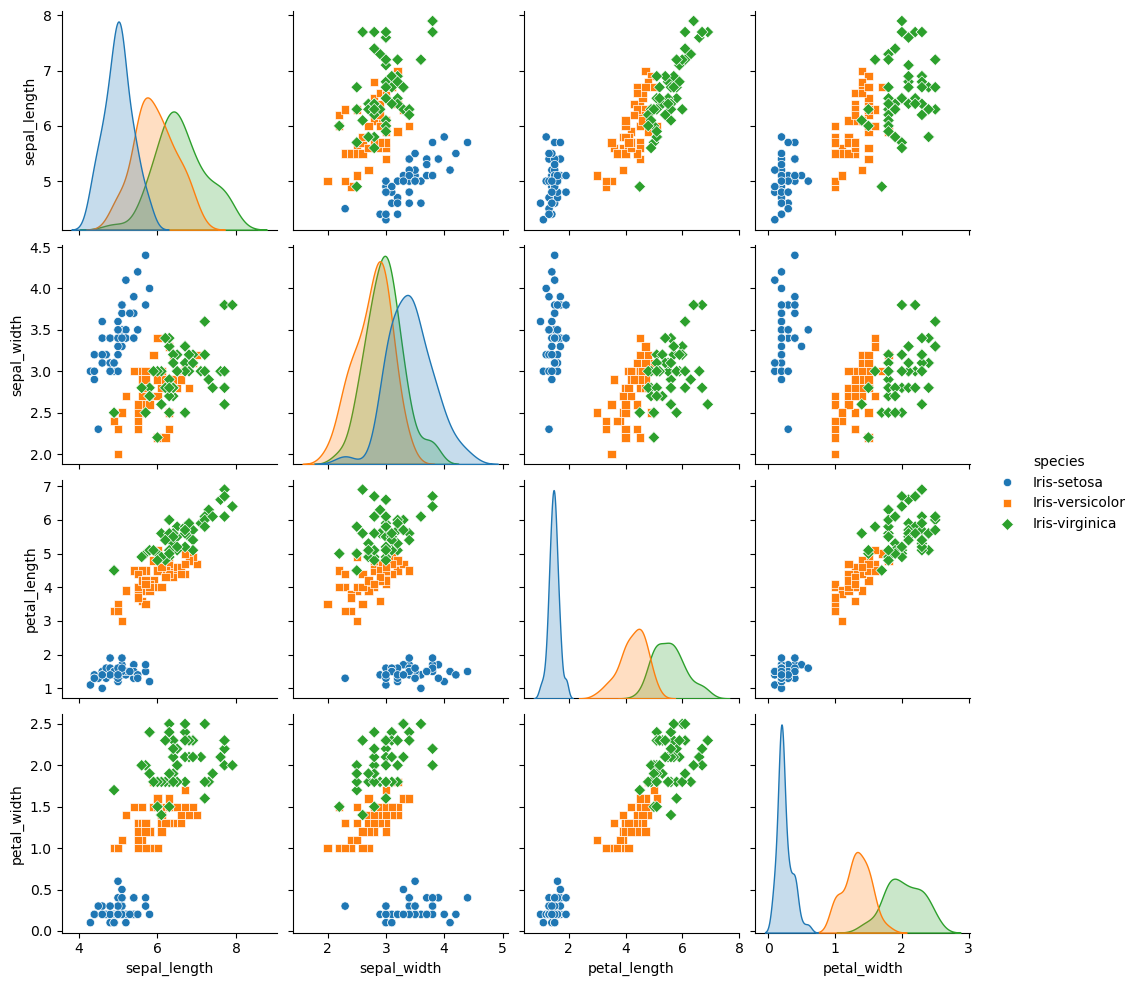

In [23]:
sns.pairplot(df1, hue="species", markers=["o", "s", "D"])

Can see that the petal length and width among iris setosa follows a normal distribution with a much lower expected value compared to the other two. We can however see that sepal length and width are much more alike among the three species. However, even so, among iris setosa we see the sepal length being smaller while sepal width being bigger.

## Birdwatching


Getting to know the dataset provided to us in the "artportalen.csv" file. 

In [24]:
df2 = pd.read_csv("artportalen.csv")
df2.shape

(21916, 27)

In [25]:
df2.columns

Index(['Id', 'Taxonsorteringsordning', 'Rödlistade', 'Artnamn',
       'Vetenskapligt namn', 'Auktor', 'Antal', 'Ålder/stadium', 'Kön',
       'Aktivitet', 'Lokalnamn', 'Ostkoordinat', 'Nordkoordinat',
       'Noggrannhet', 'Diffusion', 'Län', 'Kommun', 'Provins', 'Församling',
       'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Kommentar', 'Biotop',
       'Rapportör', 'Observatörer'],
      dtype='object')

In [26]:
df2.describe()

,Id,Taxonsorteringsordning,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion
count,2.191600e+04,21916.000000,2.191600e+04,2.191600e+04,21916.000000,21916.0
mean,9.981252e+07,54752.077660,1.629865e+06,6.583355e+06,288.540473,0.0
std,1.072560e+06,513.149522,3.184815e+03,3.052448e+03,413.406928,0.0
min,9.778507e+07,53905.000000,1.622830e+06,6.579964e+06,0.000000,0.0
25%,9.895787e+07,54222.000000,1.626851e+06,6.580712e+06,94.000000,0.0
50%,9.979669e+07,54944.000000,1.630050e+06,6.581857e+06,187.000000,0.0
75%,1.007643e+08,55213.000000,1.633107e+06,6.585409e+06,250.000000,0.0
max,1.015078e+08,55488.000000,1.635000e+06,6.590025e+06,4679.000000,0.0


## What are the most prevelant species?

In [27]:
df2["Antal"] = pd.to_numeric(df2["Antal"], errors = "coerce") # force dtype

df2_cleaned = df2.dropna(subset=["Artnamn", "Antal"])  

df2_cleaned["Antal"] = df2_cleaned["Antal"].astype(int)  # Ensure "Antal" is float
total_observations = df2_cleaned.groupby("Artnamn", as_index=False)["Antal"].sum()


most_prevalent_species_sorted = total_observations.nlargest(3, "Antal")
most_prevalent_species_sorted

/var/folders/f8/vyrq4n955xn83lyb4_6x36h00000gn/T/ipykernel_8577/1539423136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned["Antal"] = df2_cleaned["Antal"].astype(int)  # Ensure "Antal" is float


,Artnamn,Antal
42,Grönsiska,20211
119,Sothöna,8308
29,Gräsand,7167


## What is the monthly distribution of the top 3 most prevelant species?

# What are the rarest species?

In [28]:
most_prevalent_species_sorted_reverse = total_observations.nsmallest(3,"Antal")
most_prevalent_species_sorted_reverse

,Artnamn,Antal
1,Bivråk,1
11,Bändelkorsnäbb,1
17,Ejder,1
